In [1]:
import pandas as pd
import numpy as np

training_raw = pd.read_csv('train_data.csv')
test_raw = pd.read_csv('test_data.csv')

In [2]:
genres_dummy = training_raw["genres_x"].str.get_dummies(sep= '|')

In [3]:
genres_dummy['(no genres listed)'].value_counts()

0    286337
1        27
Name: (no genres listed), dtype: int64

## Preprocessing Steps

* Convert Genres, directors, writers  to dummies & concat
    * removed directors & writers as dimensionality worsens
* Remove `['Unnamed: 0','primaryTitle',
                      'originalTitle','titleType',
                      'tconst','endYear',
                      'averageRating','genres',
                     'Title', 'Genres',
                     'directors','writers'] `
* Check endYear values
* Remove rows with missing values

In [4]:
training_raw.columns

Index(['Unnamed: 0', 'userId', 'movieId', 'rating', 'timestamp', 'title',
       'genres_x', 'tconst', 'titleType', 'primaryTitle', 'originalTitle',
       'isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres_y',
       'averageRating', 'numVotes', 'directors', 'writers'],
      dtype='object')

In [5]:
training_raw.isna().any()

Unnamed: 0        False
userId            False
movieId           False
rating            False
timestamp         False
title             False
genres_x          False
tconst            False
titleType         False
primaryTitle      False
originalTitle     False
isAdult           False
startYear         False
endYear           False
runtimeMinutes    False
genres_y          False
averageRating     False
numVotes          False
directors         False
writers           False
dtype: bool

In [6]:
def preprocessing(df):
    genres_dummy = df["genres_x"].str.get_dummies(sep= '|')
    
    userid = df['userId']
    df['userId_ori'] = userid    
    
    movieId = df['movieId']
    df['movieId_ori'] = movieId   
    
    #directors_dummy = df["directors"].str.get_dummies(sep= ',')
    #writers_dummy = df["writers"].str.get_dummies(sep= ',')
    
    # '\N' comes from one-hot encode
    df = df.drop(labels = ['Unnamed: 0',
                      'originalTitle', 'title', 'genres_x',
                      'tconst', 'titleType', 'endYear',
                      'averageRating','genres_x',
                     'titleType','directors','writers', 'genres_y'] , 
             axis = 'columns'
            )
    df = pd.concat([df,genres_dummy], 
                   axis = 1
                  )
    df.dropna(axis=0, how='any'
             )
    
    #remove rows whose 'startYear' value '\\N', & convert back to int
    mask = df['startYear'].isin(['\\N'])
    df = df[~mask]
    df['startYear'] = df['startYear'].astype('int')
    return df

In [7]:
pd.set_option('display.max_columns', None)
training_raw.head(5)

,Unnamed: 0,userId,movieId,rating,timestamp,title,genres_x,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres_y,averageRating,numVotes,directors,writers
0,185635,126180,2249,2.5,1150714271,My Blue Heaven,Comedy,tt0100212,movie,My Blue Heaven,My Blue Heaven,0,1990,\N,97,"Comedy,Crime",6.3,18896,nm0006889,nm0001188
1,285788,40636,160438,2.0,1553878417,Jason Bourne,Action,tt4196776,movie,Jason Bourne,Jason Bourne,0,2016,\N,123,"Action,Thriller",6.6,210112,nm0339030,"nm0339030,nm0002582,nm0524924"
2,60825,47628,8810,3.5,1107559253,AVP: Alien vs. Predator,Action|Horror|Sci-Fi|Thriller,tt0370263,movie,Alien vs. Predator,AVP: Alien vs. Predator,0,2004,\N,101,"Action,Adventure,Horror",5.6,185982,nm0027271,"nm0639321,nm0795953,nm0859029,nm0859049,nm0027271"
3,247628,109731,2018,4.0,1025848511,Bambi,Animation|Children|Drama,tt0034492,movie,Bambi,Bambi,0,1942,\N,70,"Animation,Drama,Family",7.3,132275,"nm0314671,nm0373871,nm0730860,nm0359457,nm0204...","nm0759041,nm0668998,nm0604392,nm0821707,nm0789..."
4,141955,93451,1645,3.5,1121352601,The Devil's Advocate,Drama|Mystery|Thriller,tt0118971,movie,The Devil's Advocate,The Devil's Advocate,0,1997,\N,144,"Drama,Mystery,Thriller",7.5,335115,nm0000431,"nm0003825,nm0501380,nm0006904"


In [8]:
pd.set_option('display.max_columns', None)
training_raw_pre1 = preprocessing(training_raw)
test_raw_pre1 = preprocessing(test_raw)
print(training_raw_pre1.shape)
print(test_raw_pre1.shape)

(286364, 31)
(71591, 31)


In [9]:
training_raw_pre1.head(5)

,userId,movieId,rating,timestamp,primaryTitle,isAdult,startYear,runtimeMinutes,numVotes,userId_ori,movieId_ori,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,126180,2249,2.5,1150714271,My Blue Heaven,0,1990,97,18896,126180,2249,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,40636,160438,2.0,1553878417,Jason Bourne,0,2016,123,210112,40636,160438,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,47628,8810,3.5,1107559253,Alien vs. Predator,0,2004,101,185982,47628,8810,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
3,109731,2018,4.0,1025848511,Bambi,0,1942,70,132275,109731,2018,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,93451,1645,3.5,1121352601,The Devil's Advocate,0,1997,144,335115,93451,1645,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0


In [10]:
training_raw_pre1['(no genres listed)'].value_counts()

0    286337
1        27
Name: (no genres listed), dtype: int64

## Simple EDA

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

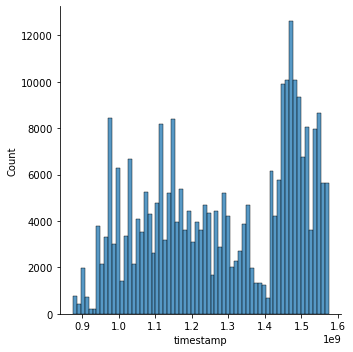

In [12]:
sns_plot1 = sns.displot(training_raw_pre1, x="timestamp")
sns_plot1.savefig('Timestamp.jpg') 

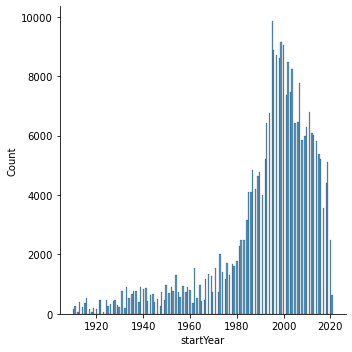

In [13]:
sns_plot2 = sns.displot(training_raw_pre1, x="startYear")
sns_plot2.savefig('startYear.jpg')

In [14]:
np.sort(training_raw_pre1.rating.unique()
       )

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

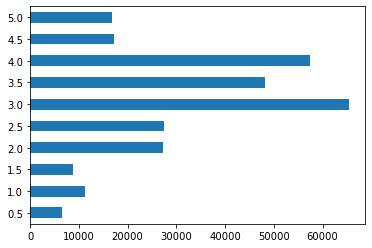

In [15]:
rating_order = np.sort(training_raw_pre1.rating.unique()
       )
mapping = {rating: i for i, rating in enumerate(rating_order)}
key = training_raw_pre1['rating'].map(mapping)
rating_plot = training_raw_pre1.iloc[key.argsort()].rating.value_counts().sort_index().plot.barh()
fig_rating = rating_plot.get_figure()
fig_rating.savefig("ratings.png")

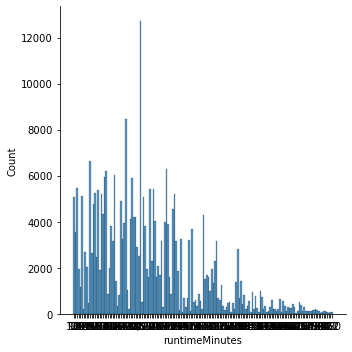

In [16]:
sns_plot3 = sns.displot(training_raw_pre1, x="runtimeMinutes")
sns_plot3.savefig('runtimeMinutes.jpg')

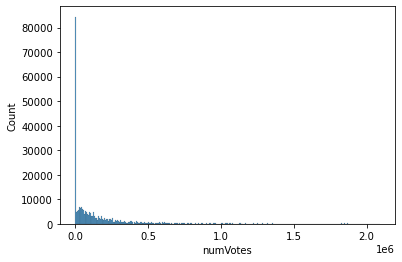

In [17]:
fig1, ax1 = plt.subplots()
g = sns.histplot(training_raw_pre1, x="numVotes", ax = ax1)
# g.set_xticklabels(g.get_xticklabels(), rotation=30)

<AxesSubplot:>

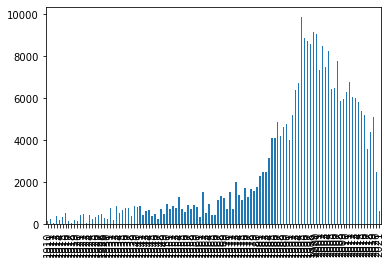

In [18]:
training_raw_pre1.startYear.value_counts().sort_index().plot.bar()

<AxesSubplot:>

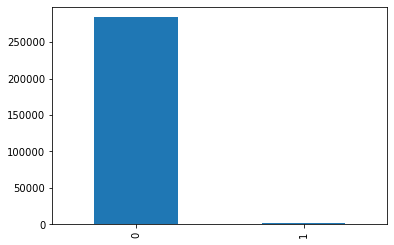

In [19]:
training_raw_pre1.isAdult.value_counts().plot.bar()

# Preprocessing 2

In [20]:
def preprocessing_2(df):
    #directors_dummy = df["directors"].str.get_dummies(sep= ',')
    #writers_dummy = df["writers"].str.get_dummies(sep= ',')
    is_adult_dummy = pd.get_dummies(df.isAdult, prefix='adult_')
    df = df.drop(labels = ['isAdult'] , 
             axis = 'columns',
           )
    df = pd.concat([df,
                   is_adult_dummy], 
                   axis = 1
                  )
    df.dropna(axis=0, how='any'
             )
    
    # from timestamp_ratings extract year and month
    df['rating_month'] = pd.to_datetime(df.timestamp, unit = 's'
              ).dt.month
    df['rating_year'] = pd.to_datetime(df.timestamp, unit = 's'
              ).dt.year
    rating_month_dummy = pd.get_dummies(df['rating_month'], prefix='rating_month_')
    df = pd.concat([df,
                   rating_month_dummy], 
                   axis = 1
                  )
    df = df.drop(labels = ['timestamp',
                          'rating_month'],
                axis = 'columns')
    return df

In [21]:
training_raw_pre2= preprocessing_2(training_raw_pre1)
test_raw_pre2= preprocessing_2(test_raw_pre1)

In [22]:
training_raw_pre2.dtypes

userId                  int64
movieId                 int64
rating                float64
primaryTitle           object
startYear               int32
runtimeMinutes         object
numVotes                int64
userId_ori              int64
movieId_ori             int64
(no genres listed)      int64
Action                  int64
Adventure               int64
Animation               int64
Children                int64
Comedy                  int64
Crime                   int64
Documentary             int64
Drama                   int64
Fantasy                 int64
Film-Noir               int64
Horror                  int64
IMAX                    int64
Musical                 int64
Mystery                 int64
Romance                 int64
Sci-Fi                  int64
Thriller                int64
War                     int64
Western                 int64
adult__0                uint8
adult__1                uint8
rating_year             int64
rating_month__1         uint8
rating_mon

In [23]:
training_raw_pre2.runtimeMinutes.unique()

array(['97', '123', '101', '70', '144', '102', '197', '128', '132', '170',
       '95', '80', '118', '96', '126', '113', '134', '92', '109', '106',
       '100', '145', '84', '112', '130', '105', '140', '181', '154', '94',
       '122', '111', '90', '65', '66', '99', '98', '88', '103', '125',
       '86', '\\N', '155', '108', '124', '129', '77', '110', '75', '107',
       '115', '142', '135', '133', '87', '167', '120', '93', '117', '81',
       '153', '116', '104', '85', '82', '194', '114', '56', '73', '48',
       '150', '91', '189', '127', '78', '69', '71', '146', '157', '163',
       '119', '143', '137', '83', '79', '138', '76', '131', '121', '52',
       '58', '50', '172', '168', '156', '162', '74', '173', '148', '159',
       '136', '89', '57', '139', '191', '68', '188', '187', '64', '201',
       '141', '158', '55', '54', '192', '147', '60', '53', '152', '245',
       '228', '61', '151', '183', '47', '290', '165', '149', '185', '72',
       '45', '244', '49', '63', '164', '161', 

In [24]:
#remove rows whose 'startYear' value '\\N', & convert back to int
mask = training_raw_pre2['runtimeMinutes'].isin(['\\N'])
training_raw_pre2 = training_raw_pre2[~mask]
training_raw_pre2['runtimeMinutes'] = training_raw_pre2['runtimeMinutes'].astype('int')
print(training_raw_pre2.shape)

mask = test_raw_pre2['runtimeMinutes'].isin(['\\N'])
test_raw_pre2 = test_raw_pre2[~mask]
test_raw_pre2['runtimeMinutes'] = test_raw_pre2['runtimeMinutes'].astype('int')
print(test_raw_pre2.shape)

(273646, 44)
(68433, 44)


In [25]:
training_raw_pre2.head(1)

,userId,movieId,rating,primaryTitle,startYear,runtimeMinutes,numVotes,userId_ori,movieId_ori,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,adult__0,adult__1,rating_year,rating_month__1,rating_month__2,rating_month__3,rating_month__4,rating_month__5,rating_month__6,rating_month__7,rating_month__8,rating_month__9,rating_month__10,rating_month__11,rating_month__12
0,126180,2249,2.5,My Blue Heaven,1990,97,18896,126180,2249,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2006,0,0,0,0,0,1,0,0,0,0,0,0


In [26]:
training_raw_pre2.dtypes

userId                  int64
movieId                 int64
rating                float64
primaryTitle           object
startYear               int32
runtimeMinutes          int32
numVotes                int64
userId_ori              int64
movieId_ori             int64
(no genres listed)      int64
Action                  int64
Adventure               int64
Animation               int64
Children                int64
Comedy                  int64
Crime                   int64
Documentary             int64
Drama                   int64
Fantasy                 int64
Film-Noir               int64
Horror                  int64
IMAX                    int64
Musical                 int64
Mystery                 int64
Romance                 int64
Sci-Fi                  int64
Thriller                int64
War                     int64
Western                 int64
adult__0                uint8
adult__1                uint8
rating_year             int64
rating_month__1         uint8
rating_mon

# Train-Validation Split

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(training_raw_pre2.drop(['rating'], axis = 'columns'), 
                                                    training_raw_pre2.rating,
                                                    shuffle = True,
                                                    stratify=training_raw_pre2.rating, 
                                                    test_size=0.15,
                                                 random_state = 42)

In [28]:
X_test = test_raw_pre2.drop(['rating'], axis = 'columns')
y_test = test_raw_pre2['rating']

In [29]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(232599, 43)
(41047, 43)
(68433, 43)
(232599,)
(41047,)
(68433,)


In [30]:
y_train

203338    0.5
180833    3.0
134019    3.5
3216      4.5
248025    4.0
         ... 
193134    2.0
155495    2.0
67335     2.5
97220     3.5
67259     4.0
Name: rating, Length: 232599, dtype: float64

# MinMaxScale Numerical Features
Retains distribution of numerical variables
userID not encoded as categorical variable due to dimensionality issue

In [31]:
X_train.iloc[[1],:]

,userId,movieId,primaryTitle,startYear,runtimeMinutes,numVotes,userId_ori,movieId_ori,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,adult__0,adult__1,rating_year,rating_month__1,rating_month__2,rating_month__3,rating_month__4,rating_month__5,rating_month__6,rating_month__7,rating_month__8,rating_month__9,rating_month__10,rating_month__11,rating_month__12
180833,30111,94478,Dark Shadows,2012,113,249093,30111,94478,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,2013,0,0,0,0,0,1,0,0,0,0,0,0


In [32]:
from sklearn.preprocessing import MinMaxScaler
enc = MinMaxScaler()
numerical_features = ['userId', 'movieId',
                     'startYear', 'runtimeMinutes',
                     'numVotes','rating_year']
numerical_transform_train = enc.fit_transform(X_train[numerical_features])
numerical_transform_val = enc.transform(X_val[numerical_features])
numerical_transform_test = enc.transform(X_test[numerical_features])

for encoded_num_vars in [numerical_transform_train, 
           numerical_transform_val, 
           numerical_transform_test]:
    print(encoded_num_vars.shape)

(232599, 6)
(41047, 6)
(68433, 6)


In [33]:
numerical_transform_train = pd.DataFrame(numerical_transform_train,
                  index = X_train.index,
                  columns = numerical_features)
numerical_transform_val = pd.DataFrame(numerical_transform_val,
                  index = X_val.index,
                  columns = numerical_features)
numerical_transform_test = pd.DataFrame(numerical_transform_test,
                  index = X_test.index,
                  columns = numerical_features)

for df in [numerical_transform_train, numerical_transform_val, numerical_transform_test]:
    print(df.shape)

(232599, 6)
(41047, 6)
(68433, 6)


In [34]:
X_train_trf1 = pd.concat([X_train.drop(numerical_features, axis=1), 
            numerical_transform_train], axis = 1)
X_val_trf1 = pd.concat([X_val.drop(numerical_features, axis=1), 
            numerical_transform_val], axis = 1)
X_test_trf1 = pd.concat([X_test.drop(numerical_features, axis=1), 
            numerical_transform_test], axis = 1)
for df in [X_train_trf1, X_val_trf1, X_test_trf1]:
    print(df.shape)
    

(232599, 43)
(41047, 43)
(68433, 43)


In [35]:
for df in [X_train_trf1, X_val_trf1, X_test_trf1]:
    print(df.shape)

for df in [y_train, y_val, y_test]:
    print(df.shape)

(232599, 43)
(41047, 43)
(68433, 43)
(232599,)
(41047,)
(68433,)


In [36]:
X_train_trf1.to_csv('X_train_trf1_v3.csv' ,index=False)
X_val_trf1.to_csv('X_val_trf1_v3.csv' ,index=False)
X_test_trf1.to_csv('X_test_trf1_v3.csv' ,index=False)
y_train.to_csv('y_train_nn_v3.csv' ,index=False)
y_val.to_csv('y_val_nn_v3.csv' ,index=False)
y_test.to_csv('y_test_nn_v3.csv' ,index=False)

# For XGBoost Use, need to convert labels to indices starting from 0:

In [37]:
np.sort(y_train.unique()
       )

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [38]:
# Map unique values of ratings, to categories indexed from 0 onwards
#create a mapping from labels to a unique integer and vice versa for labelling and prediction later
labels = np.sort(y_train.unique()
       )
i = 0
index_to_class = {} 
class_to_index = {}
for tp in labels:
    index_to_class[i] = tp
    class_to_index[tp] = i
    i += 1


In [39]:
y_train_xg = y_train.replace(class_to_index)
y_val_xg = y_val.replace(class_to_index)
y_test_xg = y_test.replace(class_to_index)

for i in [y_train_xg, y_val_xg, y_test_xg]:
    print(i.shape)

(232599,)
(41047,)
(68433,)


In [40]:
X_train_trf1

,primaryTitle,userId_ori,movieId_ori,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,adult__0,adult__1,rating_month__1,rating_month__2,rating_month__3,rating_month__4,rating_month__5,rating_month__6,rating_month__7,rating_month__8,rating_month__9,rating_month__10,rating_month__11,rating_month__12,userId,movieId,startYear,runtimeMinutes,numVotes,rating_year
203338,X-Men: Days of Future Past,123711,111362,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.758627,0.570620,0.936364,0.181556,0.317932,0.863636
180833,Dark Shadows,30111,94478,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0.176422,0.484105,0.918182,0.154179,0.119168,0.727273
134019,Some Kind of Wonderful,103611,1290,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0.633602,0.006605,0.690909,0.128242,0.013526,0.909091
3216,Titanic,32462,1721,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0.191045,0.008813,0.290909,0.113833,0.000664,0.681818
248025,Mona Lisa Smile,98227,7154,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0.600113,0.036652,0.836364,0.159942,0.037248,0.318182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193134,My Best Friend's Wedding,39732,1569,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0.236266,0.008035,0.781818,0.142651,0.062678,0.954545
155495,Fierce Creatures,93451,1425,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0.570406,0.007297,0.781818,0.125360,0.011222,0.363636
67335,101 Dalmatians,53837,1367,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0.324001,0.006999,0.772727,0.139769,0.048908,0.909091
97220,Enter the Dragon,137293,7482,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0.843109,0.038333,0.863636,0.063401,0.000011,0.681818


In [41]:
class_to_index 

{0.5: 0,
 1.0: 1,
 1.5: 2,
 2.0: 3,
 2.5: 4,
 3.0: 5,
 3.5: 6,
 4.0: 7,
 4.5: 8,
 5.0: 9}

In [42]:
pd.concat([y_train, y_train_xg], axis = 1)

,rating,rating
203338,0.5,0.0
180833,3.0,5.0
134019,3.5,6.0
3216,4.5,8.0
248025,4.0,7.0
...,...,...
193134,2.0,3.0
155495,2.0,3.0
67335,2.5,4.0
97220,3.5,6.0


In [43]:
y_train_xg.to_csv('y_train_xg_v3.csv' ,index=False)
y_val_xg.to_csv('y_val_xg_v3.csv' ,index=False)
y_test_xg.to_csv('y_test_xg_v3.csv' ,index=False)

In [44]:
for df in [X_train_trf1, X_val_trf1, X_test_trf1]:
    print(df.shape)

for df in [y_train_xg, y_val_xg, y_test_xg]:
    print(df.shape)



(232599, 43)
(41047, 43)
(68433, 43)
(232599,)
(41047,)
(68433,)
